In [2]:
import numpy as np
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pyarrow.parquet as pq

## Load and filter the data

In [9]:
data2020 = pd.DataFrame()
data2019 = pd.DataFrame()
data2018 = pd.DataFrame()
data2017 = pd.DataFrame()
data2016 = pd.DataFrame()
data2015 = pd.DataFrame()

def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        data = pd.DataFrame()
        
        # Take only the quotes about climate change
        keywords = ["limate change", "lobal warming", "COP", "limate variation", "limate crisis", "CO2 emissions", 
                    "reenhouse effect", "reenhouse gas", "limate emergency", "nvironmental crisis"]
        mask = chunk.quotation.apply(lambda x: any(word in x for word in keywords))
        data = chunk[mask]

        print("Number of filtered quotes {} out of {}".format(len(data), len(chunk)))
        data[['quotation', 'speaker']].head()
        
        # Drop quotes without speaker
        no_speaker = data[data.speaker == "None"].index
        data = data.drop(no_speaker)
        print("{} quotes are removed".format(len(no_speaker)))
        
        # Drop useless informations
        del data["probas"]
        del data["phase"]
        del data["qids"]
        del data["urls"]


        return data
    

with pd.read_json('quotes-2020.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2020 = data2020.append(process_chunk(chunk))
        
with pd.read_json('quotes-2019.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2019 = data2019.append(process_chunk(chunk))
        
with pd.read_json('quotes-2018.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2018 = data2018.append(process_chunk(chunk))
        
with pd.read_json('quotes-2017.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2017 = data2017.append(process_chunk(chunk))
        
with pd.read_json('quotes-2016.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2016 = data2016.append(process_chunk(chunk))
    
with pd.read_json('quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=1000000) as df_reader:
    for chunk in df_reader:    
        data2015 = data2015.append(process_chunk(chunk))
        
data2020.to_pickle("./data2020.pkl")
data2019.to_pickle("./data2019.pkl")
data2018.to_pickle("./data2018.pkl")
data2017.to_pickle("./data2017.pkl")
data2016.to_pickle("./data2016.pkl")
data2015.to_pickle("./data2015.pkl")

Processing chunk with 1000000 rows
Number of filtered quotes 2142 out of 1000000
674 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2205 out of 1000000
708 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2181 out of 1000000
700 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2183 out of 1000000
689 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2143 out of 1000000
673 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2068 out of 1000000
672 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2126 out of 1000000
659 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2067 out of 1000000
652 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 2249 out of 1000000
688 quotes are removed
Processing chunk with 1000000 rows
Number of filtered quotes 216

In [10]:
data2020.to_pickle("./data2020.pkl")
data2019.to_pickle("./data2019.pkl")
data2018.to_pickle("./data2018.pkl")
data2017.to_pickle("./data2017.pkl")
data2016.to_pickle("./data2016.pkl")
data2015.to_pickle("./data2015.pkl")

Saving the filtered data as pickle will save a lot of time later. 

In [ ]:
print(len(data2020))
data2020.head()

In [4]:
print(len(data2019))
data2019.head()

32651


,quoteID,quotation,speaker,date,numOccurrences
1015,2019-09-26-057277,It's managing those zillions of microbial cell...,Thomas Crowther,2019-09-26 11:00:45,1
2314,2019-03-28-015294,Climate change is the single most important is...,Nicola Sturgeon,2019-03-28 14:55:43,1
2316,2019-06-28-012580,Climate change represents an existential threa...,Kamala Harris,2019-06-28 04:10:00,1
3028,2019-05-08-019902,"Even for Australians who can afford to pay, ge...",Dr Karl,2019-05-08 22:36:00,5
5577,2019-01-20-042295,The challenges this year will include global t...,Nguyen Xuan Phuc,2019-01-20 03:40:26,7


In [ ]:
print(len(data2018))
data2018.head()

In [ ]:
print(len(data2017))
data2017.head()

In [ ]:
print(len(data2016))
data2016.head()

In [ ]:
print(len(data2015))
data2015.head()

## Load data from pickle

In [3]:
data2019 = pd.read_pickle('data2019.pkl', compression='infer')

In [ ]:
data2020 = pd.read_pickle('data2020.pkl', compression='infer')
data2019 = pd.read_pickle('data2019.pkl', compression='infer')
data2018 = pd.read_pickle('data2018.pkl', compression='infer')
data2017 = pd.read_pickle('data2017.pkl', compression='infer')
data2016 = pd.read_pickle('data2016.pkl', compression='infer')
data2015 = pd.read_pickle('data2015.pkl', compression='infer')

## Load speaker data

In [8]:
df_QID= pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')
df_QID.head()

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America


In [9]:
df_speaker = pd.read_parquet("speaker_attributes.parquet", engine='pyarrow')
df_speaker.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [190]:
len(df_QID)
df_QID[df_QID.index == 'Q7994501']

,Label,Description
QID,,
Q7994501,White British,ethnicity classification used in the 2011 Unit...


In [11]:
len(df_speaker)

9055981

In [64]:
df_QID.Label[df_QID.index == 'Q30']

QID
Q30    United States of America
Name: Label, dtype: object

In [173]:
Bernie_Sanders_occupations = df_speaker[df_speaker.label == 'Bernie Sanders'].occupation.to_numpy()[0]
Bernie_Sanders_party = df_speaker[df_speaker.label == 'Bernie Sanders'].party.to_numpy()[0]

In [236]:
Greta_occupations = df_speaker[df_speaker.label == 'Greta Thunberg'].occupation.to_numpy()[0]
Greta_party = df_speaker[df_speaker.label == 'Greta Thunberg'].party.to_numpy()[0]

In [237]:
print(Greta_party)

None


In [156]:
df_QID.loc[df_QID.index.intersection(Bernie_Sanders_occupations)]


,Label,Description
QID,,
Q154549,carpenter,profession; person who performs carpentry
Q1622272,university teacher,person teaching at a university
Q36180,writer,person who uses written words to communicate i...
Q82955,politician,"person involved in politics, person who holds ..."
Q578109,television producer,occupation within video production for TV
Q1930187,journalist,"person who collects, writes and distributes ne..."


In [174]:
df_QID.loc[df_QID.index.intersection(Bernie_Sanders_party)]

,Label,Description
QID,,
Q327591,independent politician,individual not affiliated to any political party
Q29552,Democratic Party,political party in the United States
Q6542163,Liberty Union Party,political party in Vermont


# First visualization of the data

### Number of words per quote

In [51]:
word_per_quote = data2019["quotation"].apply(lambda x : len(x.split()))

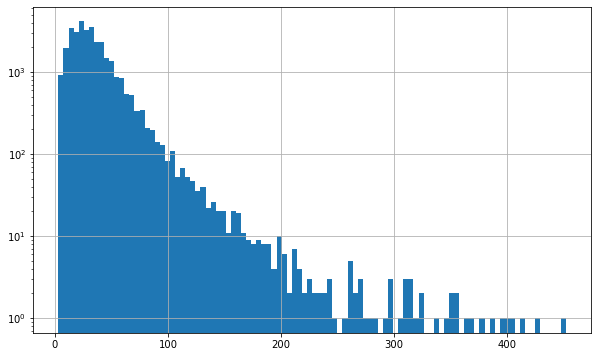

In [59]:
word_per_quote.hist(bins=100,  figsize=(10, 6))
plt.yscale('log')

plt.title('Number of words per quote')
plt.xlabel('Number of words')
plt.ylabel('Number of quotes [log]')

plt.show()

Words embeding models are sensible to the difference in the length of the quotes, thus it can be helpful to be aware that we might have issues because of this inbalance.
Not forget here that dots and commas are also counted as words. 

### Repartition over the year

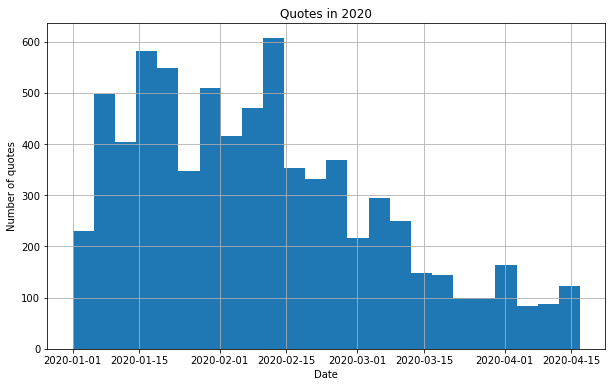

2020-01-01 00:00:00
2020-04-16 20:46:52


In [12]:
data2020['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2020')
plt.show()

print(min(data2020['date']))
print(max(data2020['date']))

#### Comments
* Much less apparition of the climate change in the newspapper from in March and April 2020. The decrease coincides with the explosion of the pandemic of Covid-19 in the world. 

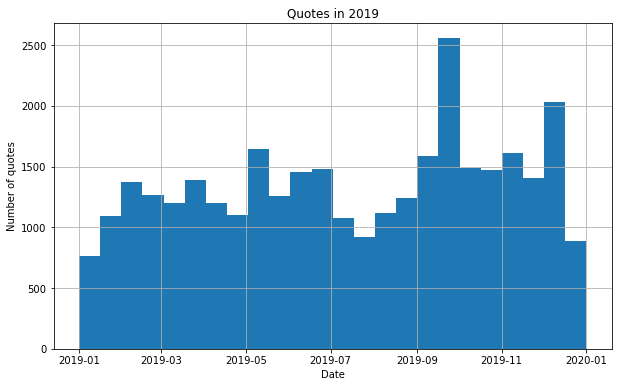

2019-01-01 02:18:32
2019-12-31 23:29:13


In [25]:
data2019['date'].hist(bins=24, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of quotes')
plt.title('Quotes in 2019')
plt.show()

print(min(data2019['date']))
print(max(data2019['date']))

#### Comments
* Peak in end of september. By looking on the internet the first result shows that the month of september 2019 was the hottest ever seen since the beginning of the regostration of the temperature.
* The second peak, beginning of December, coicides with the date of the COP25.

### Speakers that come up the more often

In [160]:
n = 20

In [163]:
most_speaker = data2019['speaker'].value_counts()[:n].index.tolist()

At first sight, we can see that there is mostly politicians.  
If we look at the american politicians, most of them are democrate: Bernie Sanders, Alexandria Ocasio-Cortez, Elizabeth Warren, Michael Bloomberg, Nancy Pelosi.
For further analysis, we will use the speaker data. 

In [167]:
df_most_speaker = pd.DataFrame(columns = ['speaker', 'party', 'academic degree'])

In [168]:
df_most_speaker.speaker = most_speaker

df_most_speaker.party = df_QID.loc[df_QID.index.intersection()]

In [240]:
most_speaker_party = []
for n,i in enumerate(most_speaker):
    print(i)
    if df_speaker[df_speaker.label == i].party.empty :
        most_speaker_party.append('None')
        print('salut')
    else:
        print(df_speaker[df_speaker.label == i].party)
        most_speaker_party.append(df_speaker[df_speaker.label == i].party.to_numpy()[0])
        print('2')
        if df_speaker[df_speaker.label == i].party.all:
            continue
        else:
            print(df_QID.loc[df_QID.index.intersection(most_speaker_party[n])])
        print('3')


Jay Inslee
7962066    [Q29552]
Name: party, dtype: object
2
Bernie Sanders
1148829    [Q6542163, Q29552, Q327591, Q327591, Q29552]
Name: party, dtype: object
2
Greta Thunberg
2823318    None
Name: party, dtype: object
2
Alexandria Ocasio-Cortez
538996    [Q29552]
Name: party, dtype: object
2
Elizabeth Warren
715648         None
724332         None
2965116        None
2995044        None
3013836        None
3140547        None
3319252        None
4544778    [Q29552]
4861805        None
5226892        None
5242655        None
8648553        None
8671376        None
Name: party, dtype: object
2
Justin Trudeau
86866    [Q138345]
Name: party, dtype: object
2
Antonio Guterres
salut
Scott Morrison
200265          None
200266          None
1070683         None
4184289         None
5599645         None
5859613    [Q241149]
6834055         None
7161057         None
7413252         None
8973660         None
Name: party, dtype: object
2
Catherine McKenna
368829    [Q138345]
Name: party, dtype: obj

In [241]:
print(most_speaker_party)

[array(['Q29552'], dtype=object), array(['Q6542163', 'Q29552', 'Q327591', 'Q327591', 'Q29552'], dtype=object), None, array(['Q29552'], dtype=object), None, array(['Q138345'], dtype=object), 'None', None, array(['Q138345'], dtype=object), array(['Q29552'], dtype=object), array(['Q1571660'], dtype=object), array(['Q10230'], dtype=object), None, array(['Q29552'], dtype=object), array(['Q216082'], dtype=object), None, array(['Q29552'], dtype=object), 'None', array(['Q29552'], dtype=object), None]


In [248]:
df_QID.loc[df_QID.index.intersection(most_speaker_party[7])]

TypeError: Input must be Index or array-like

## First attempts of quotations retrieval

We tried to apply an alorithm to pick up all the quotes related to cliamte change but it is not ready now. With the coming lecture we will be able to fix it.  
We focused on the 100 000 first lines of the 2020 dataset.


In [14]:
df = pd.read_json('quotes-2020.json.bz2', compression='bz2', nrows=100000, lines=True)

### 1. Word2Vec

In [15]:
# Preprocessing of the data to remove stop-words and tokenize the quotes
vocab_quotes = df.quotation.apply(gensim.utils.simple_preprocess)

In [16]:
# Define the model and the parameters
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4)

In [17]:
model.build_vocab(vocab_quotes, progress_per=1000)

In [18]:
model.train(vocab_quotes, total_examples=model.corpus_count, epochs=model.epochs)

(8829356, 11833700)

In [21]:
model.wv.most_similar("climate", topn=30)

[('economic', 0.7479218244552612),
 ('global', 0.7118955850601196),
 ('current', 0.701635479927063),
 ('data', 0.701321005821228),
 ('policy', 0.6959260106086731),
 ('environmental', 0.6941445469856262),
 ('science', 0.6937196850776672),
 ('economy', 0.6861879229545593),
 ('structural', 0.6811080574989319),
 ('risks', 0.6744256615638733),
 ('policies', 0.6719207763671875),
 ('carbon', 0.6714789867401123),
 ('financial', 0.670987069606781),
 ('transparency', 0.6707075238227844),
 ('significant', 0.6703941822052002),
 ('awareness', 0.6698325872421265),
 ('accurate', 0.6639865040779114),
 ('scope', 0.6620934009552002),
 ('urgency', 0.6592832207679749),
 ('sustainable', 0.659204363822937),
 ('investors', 0.6591705679893494),
 ('disruption', 0.6580424904823303),
 ('emissions', 0.6571123600006104),
 ('minimizes', 0.6541130542755127),
 ('sustainability', 0.6524901390075684),
 ('economies', 0.6507850885391235),
 ('consumer', 0.6506547331809998),
 ('comprehensive', 0.6459457874298096),
 ('coal'

A lot of words are not directly related to climamate change. We can use maybe this list to imporve ours but we can not use directly.

### 2. Doc2Vec

In [22]:
# We need to convert data into format supported by the Doc2Vec librairy
tagged_data = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(vocab_quotes)]

In [23]:
model = gensim.models.Doc2Vec(vector_size=100, dbow_words= 1, dm=0,  window=5, seed=1337, min_count=5, workers=4,alpha=0.025, min_alpha=0.025)

In [24]:
model.build_vocab(tagged_data)

In [25]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=10)

In [26]:
tokens = "climate warming environment".split()
new_vector = model.infer_vector(tokens)
sims = model.dv.most_similar([new_vector], topn=30)

In [27]:
for elt in sims :
    print(str(df.iloc[[elt[0]]]['quotation']))

6518    Risky Business: Climate and the Macroeconomy,
Name: quotation, dtype: object
23771    in response to the climate changing,
Name: quotation, dtype: object
47475    Responses to Climate Change,
Name: quotation, dtype: object
91030    launches a movement to change the system
Name: quotation, dtype: object
19102    overrun [ ning ] the planet,
Name: quotation, dtype: object
52652    Rise Against Militarism, Racism and the Climat...
Name: quotation, dtype: object
21455    life ‐ sustaining climate system.
Name: quotation, dtype: object
10474    epically outmatched by a global pandemic.
Name: quotation, dtype: object
19419    the global elite's panic room.
Name: quotation, dtype: object
85019    Climate World War III.
Name: quotation, dtype: object
68263    The drivers in the community are for decarboni...
Name: quotation, dtype: object
40763    Adapting to climate change isn't enough.
Name: quotation, dtype: object
95234    clear climate change fuelled the ferocity of t...
Name: quo

#### Conclusion:
We get results that seem more conclusive but we still get some incoherent quotes in the results. Furthermore, we didn't find a way to scale it for our very large data set. When chunking the data, we had to train it for every chunk which takes too long. For now, we chose to stick with the naive retrieval method.